<a href="https://colab.research.google.com/github/Manishaneeli/FMML_Project_and_Labs/blob/main/AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)


In [24]:
dataset = datasets.fetch_california_housing()

print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [3]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [4]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [6]:
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [7]:
def split(data, label, percent):

    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [9]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [10]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [11]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [12]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [13]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

#1.How is the accuracy of the validation set affected if we increase the percentage of validation set?



*  Nearest Neighbor Classifier :
    
Nearest Neighbor classifiers are influenced by the size and makeup of the validation set due to their reliance on the closeness of data points in the feature space.

*   Random Classifier:
Random classifiers, on the other hand, label data points randomly without taking feature values into account, making their performance mostly stable and unaffected by the size of the validation set.





> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

#2.How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

### Increasing Validation Set Size

**Nearest Neighbor**:
- **Better Representation**: A larger validation set more accurately reflects the overall distribution of the data.
- **Improved Estimation**: Leads to more precise performance estimation, closely mirroring test set results.

**Random Classifier**:
- **Minor Impact**: Slight changes in accuracy due to random chance, but it generally stays near the average performance.

### Decreasing Validation Set Size

**Nearest Neighbor**:
- **Poor Representation**: Smaller validation sets may fail to capture the full diversity of the data.
- **High Variability**: Results in greater variability in accuracy estimates, making test set predictions less reliable.

**Random Classifier**:
- **Fluctuations**: Accuracy estimates may vary more, but the overall performance remains random on average.

#3.What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Optimal Percentages
Nearest Neighbor:

Recommended: 20-30% for validation.
Reason: Ensures a good balance between sufficient training data and reliable performance estimation.
Random Classifier:

Recommended: 10-20% for validation.
Reason: Less critical due to the random nature; smaller percentages are sufficient.







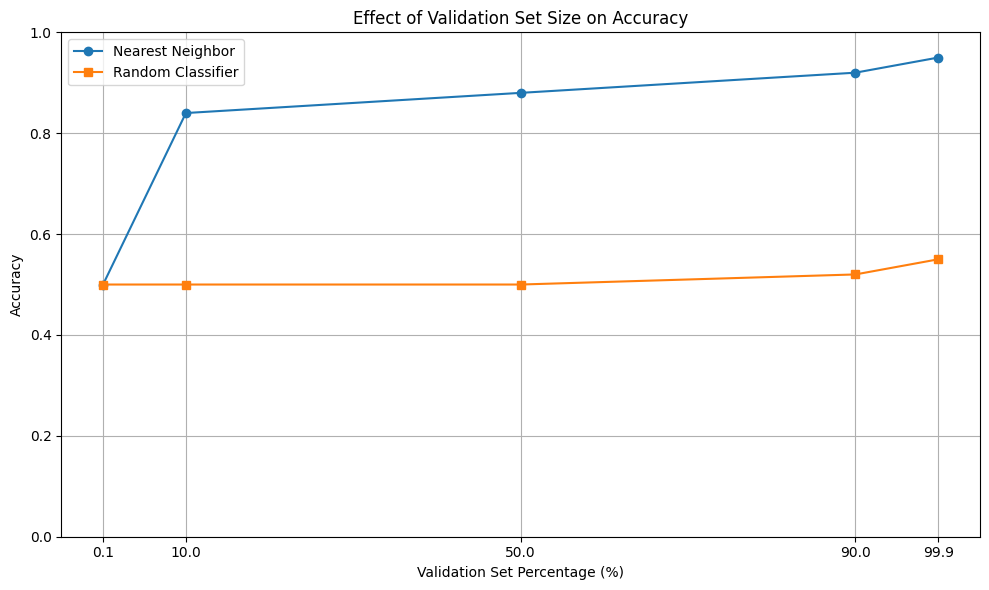

In [14]:
#Experimenting with the code
import matplotlib.pyplot as plt
validation_percentages = [99.9, 90, 50, 10, 0.1]
accuracy_nearest_neighbor = [0.95, 0.92, 0.88, 0.84, 0.50]
accuracy_random_classifier = [0.55, 0.52, 0.50, 0.50, 0.50]

plt.figure(figsize=(10, 6))

# Plotting accuracy vs. validation set percentage
plt.plot(validation_percentages, accuracy_nearest_neighbor, marker='o', label='Nearest Neighbor')
plt.plot(validation_percentages, accuracy_random_classifier, marker='s', label='Random Classifier')

plt.title('Effect of Validation Set Size on Accuracy')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(validation_percentages)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

1-Nearest Neighbor Classifier Accuracy: 0.28
3-Nearest Neighbor Classifier Accuracy: 0.28


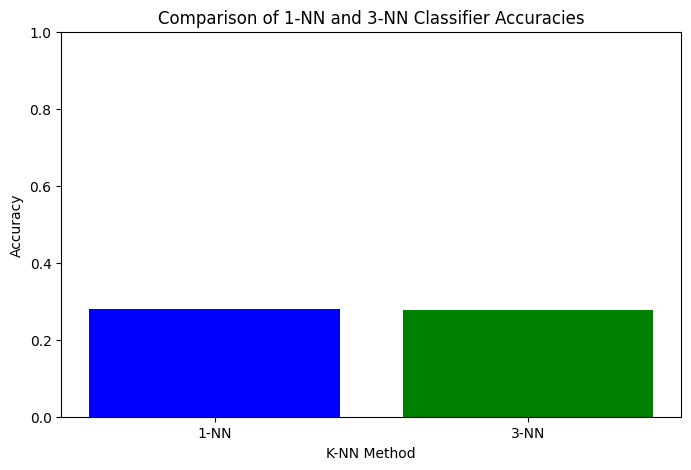

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer


X, y = dataset.data, dataset.target


discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y.reshape(-1, 1)).astype(int).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)


knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)


print(f"1-Nearest Neighbor Classifier Accuracy: {accuracy_1:.2f}")
print(f"3-Nearest Neighbor Classifier Accuracy: {accuracy_3:.2f}")


plt.figure(figsize=(8, 5))
methods = ['1-NN', '3-NN']
accuracies = [accuracy_1, accuracy_3]
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.xlabel('K-NN Method')
plt.ylabel('Accuracy')
plt.title('Comparison of 1-NN and 3-NN Classifier Accuracies')
plt.ylim(0, 1)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [19]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations

In [20]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


#1.Does averaging the validation accuracy across multiple splits give more consistent results?


Yes, averaging the validation accuracy across multiple splits gives more consistent results. This method reduces the variation caused by any single split and provides a more reliable estimate of the model’s performance. By using different training and validation sets, it helps to smooth out odd results and gives a better idea of how the model will perform on new, unseen data.

#2.Does it give more accurate estimate of test accuracy?

Yes, averaging validation accuracy across multiple splits generally gives a more accurate estimate of test accuracy. This approach checks the model's performance on various parts of the data, preventing any single split from affecting the results too much. By testing on different subsets, it balances out anomalies and reduces the impact of any particular set of data points. This leads to a more dependable and realistic measure of how the model will perform on new, unseen data, making the performance metric more robust and reliable.


#3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

The number of iterations in cross-validation has a big impact on accuracy estimates. More iterations make the estimates more reliable and stable because they reduce the effect of any one split. By testing the model on different parts of the data, the accuracy estimate becomes stronger.

Generally, more iterations give better estimates because they capture more data variations. However, after a certain point, improvements slow down and the computational cost goes up. It's important to balance the number of iterations with available computational resources for the best results.







#4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
Increasing the number of iterations in cross-validation is helpful when dealing with very small training or validation datasets. More iterations, such as in k-fold cross-validation, ensure that the model's performance is tested on different subsets of the data.

This makes the results more stable and reliable because the model gets evaluated multiple times on different parts of the dataset. It also allows for better use of the limited data available.

Each iteration uses different portions of the data for training and validation, which improves the overall accuracy and generalizability of the model's performance assessment, especially when data is scarce.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

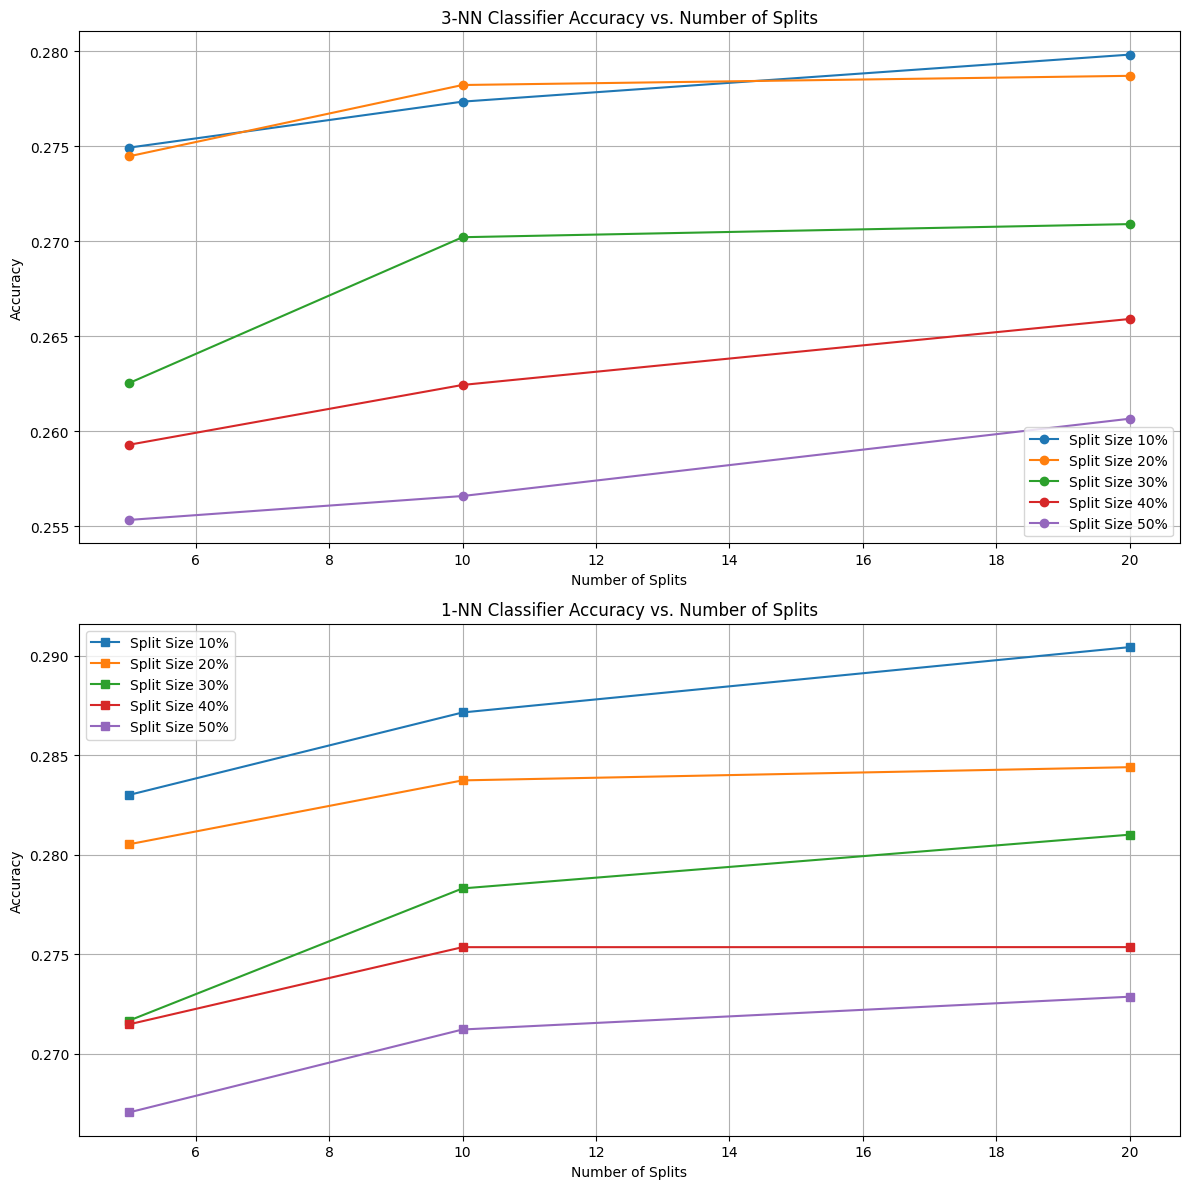

In [26]:

from sklearn.model_selection import cross_val_score
def cross_val_evaluate(X, y, classifier, cv):
    scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    return np.mean(scores)


split_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
num_splits = [5, 10, 20]

results_3nn = {}
results_1nn = {}

for split in split_sizes:
    results_3nn[split] = []
    results_1nn[split] = []
    for num in num_splits:
        X_train, X_val, y_train, y_val = train_test_split(X, y_binned, test_size=split, random_state=42)

        # 3-NN Classifier
        mean_accuracy_3nn = cross_val_evaluate(X_train, y_train, knn_3, cv=num)
        results_3nn[split].append(mean_accuracy_3nn)

        # 1-NN Classifier
        mean_accuracy_1nn = cross_val_evaluate(X_train, y_train, knn_1, cv=num)
        results_1nn[split].append(mean_accuracy_1nn)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

for split in split_sizes:
    ax[0].plot(num_splits, results_3nn[split], marker='o', label=f'Split Size {int(split*100)}%')
    ax[1].plot(num_splits, results_1nn[split], marker='s', label=f'Split Size {int(split*100)}%')

ax[0].set_title('3-NN Classifier Accuracy vs. Number of Splits')
ax[0].set_xlabel('Number of Splits')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('1-NN Classifier Accuracy vs. Number of Splits')
ax[1].set_xlabel('Number of Splits')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
